# Project Data Exploration Report
## Student Information
- Name: Your Full Name
- Student Number: Your Student Number
- GitHub Repository: https://github.com/yourusername/yourrepo

## Imports and Load Data

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

file_path = 'World Bank Projects & Operations\projects-operations-csv-.csv'
df = pd.read_csv(file_path)


## Initial Exploration

In [67]:
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18841 entries, 0 to 18840
Data columns (total 57 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        18841 non-null  object 
 1   regionname                18841 non-null  object 
 2   countryname               18841 non-null  object 
 3   prodline                  18841 non-null  object 
 4   lendinginstr              18580 non-null  object 
 5   lendinginstrtype          18580 non-null  object 
 6   envassesmentcategorycode  12731 non-null  object 
 7   supplementprojectflg      18792 non-null  object 
 8   productlinetype           18841 non-null  object 
 9   projectstatusdisplay      18839 non-null  object 
 10  status                    18839 non-null  object 
 11  project_name              18841 non-null  object 
 12  boardapprovaldate         17172 non-null  object 
 13  board_approval_month      17172 non-null  objec

In [ ]:
print("First 5 rows:")
print(df.head())


First 5 rows:
        id                    regionname  \
0  P151169  Middle East and North Africa   
1  P154943         East Asia and Pacific   
2  P161382         East Asia and Pacific   
3  P163922         East Asia and Pacific   
4  P169279         East Asia and Pacific   

                                         countryname prodline  \
0              Kingdom of Morocco;Kingdom of Morocco       PE   
1                  Kingdom of Tonga;Kingdom of Tonga       PE   
2  Republic of the Marshall Islands;Republic of t...       PE   
3  Federated States of Micronesia;Federated State...       PE   
4                                        Samoa;Samoa       PE   

                   lendinginstr lendinginstrtype envassesmentcategorycode  \
0  Investment Project Financing               IN                        B   
1  Investment Project Financing               IN                        C   
2  Investment Project Financing               IN                        B   
3  Investment Project

In [ ]:
print("Missing values per column:")
print(df.isnull().sum().sort_values(ascending=False).head(10))


Missing values per column:
majorsector_percent     18841
projectdoc              18841
mjtheme3name            18841
mjtheme2name            18841
mjsector5               18841
mjsector3               18841
mjsector4               18841
mjsector2               18841
mjsector1               18841
theme                   18841
dtype: int64


In [70]:
# Displaying the columns
df.columns

Index(['id', 'regionname', 'countryname', 'prodline', 'lendinginstr',
       'lendinginstrtype', 'envassesmentcategorycode', 'supplementprojectflg',
       'productlinetype', 'projectstatusdisplay', 'status', 'project_name',
       'boardapprovaldate', 'board_approval_month', 'closingdate',
       'lendprojectcost', 'ibrdcommamt', 'idacommamt', 'totalamt', 'grantamt',
       'borrower', 'impagency', 'url', 'projectdoc ', 'majorsector_percent ',
       'sector1', 'sector2', 'sector3', 'sector4', 'sector5', 'sector',
       'mjsector1', 'mjsector2', 'mjsector3', 'mjsector4', 'mjsector5',
       'mjsector', 'theme1', 'theme2', 'theme3', 'theme4', 'theme5', 'theme ',
       'goal', 'financier', 'mjtheme1name', 'mjtheme2name', 'mjtheme3name',
       'mjtheme4name', 'mjtheme5name', 'location', 'GeoLocID', 'GeoLocName',
       'Latitude', 'Longitude', 'Country', 'Unnamed: 56'],
      dtype='object')

## Data Cleaning

In [71]:
# Convert date columns to datetime
df['boardapprovaldate'] = pd.to_datetime(df['boardapprovaldate'], errors='coerce')
df['closingdate'] = pd.to_datetime(df['closingdate'], errors='coerce')

In [72]:
# Convert numeric columns (remove commas and coerce errors)
def to_numeric(col):
    return pd.to_numeric(df[col].str.replace(',', '').replace('', np.nan), errors='coerce')

In [73]:
for col in ['lendprojectcost', 'ibrdcommamt', 'idacommamt', 'totalamt', 'grantamt']:
    df[col] = to_numeric(col)


## Summary Statistics

In [74]:
print("Descriptive statistics:")
print(df.describe())


Descriptive statistics:
       lendprojectcost   ibrdcommamt    idacommamt      totalamt  \
count     1.870900e+04  1.884100e+04  1.884100e+04  1.884100e+04   
mean      1.390472e+08  4.300081e+07  2.315257e+07  6.615338e+07   
std       1.086281e+09  1.206323e+08  5.956621e+07  1.283990e+08   
min       0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%       9.200000e+06  0.000000e+00  0.000000e+00  5.000000e+06   
50%       3.000000e+07  0.000000e+00  0.000000e+00  2.400000e+07   
75%       1.000000e+08  3.000000e+07  2.000000e+07  7.500000e+07   
max       9.300700e+10  3.750000e+09  1.200000e+09  3.750000e+09   

           grantamt  projectdoc   majorsector_percent   mjsector1  mjsector2  \
count  1.884100e+04          0.0                   0.0        0.0        0.0   
mean   1.891359e+06          NaN                   NaN        NaN        NaN   
std    4.161612e+07          NaN                   NaN        NaN        NaN   
min    0.000000e+00          NaN           

In [75]:
print("Correlation matrix:")
corr = df[['lendprojectcost', 'ibrdcommamt', 'idacommamt', 'totalamt', 'grantamt']].corr()
print(corr)

Correlation matrix:
                 lendprojectcost  ibrdcommamt  idacommamt  totalamt  grantamt
lendprojectcost         1.000000     0.213296    0.121210  0.256724  0.034892
ibrdcommamt             0.213296     1.000000   -0.112307  0.887410 -0.016201
idacommamt              0.121210    -0.112307    1.000000  0.358401 -0.017666
totalamt                0.256724     0.887410    0.358401  1.000000 -0.023417
grantamt                0.034892    -0.016201   -0.017666 -0.023417  1.000000


## Plots

In [76]:
def plot_project_counts_by_region():
    plt.figure(figsize=(12,6))
    sns.countplot(data=df, y='regionname', order=df['regionname'].value_counts().index)
    plt.title('Number of Projects by Region')
    plt.xlabel('Count')
    plt.ylabel('Region')
    plt.tight_layout()
    plt.show()

In [77]:
def plot_scatter_lendprojectcost_vs_totalamt():
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=df, x='lendprojectcost', y='totalamt', alpha=0.5)
    plt.title('Lend Project Cost vs Total Amount')
    plt.xlabel('Lend Project Cost (USD)')
    plt.ylabel('Total Amount (USD)')
    plt.tight_layout()
    plt.show()

In [78]:
def plot_correlation_heatmap():
    plt.figure(figsize=(8,6))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap of Financial Columns')
    plt.tight_layout()
    plt.show()

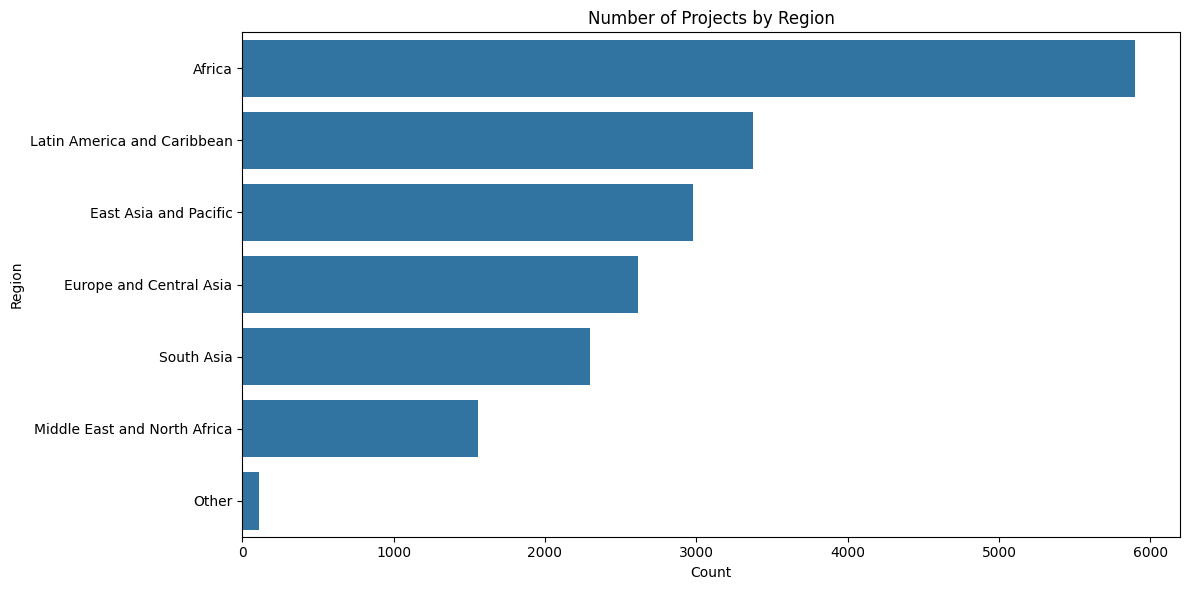

In [79]:
plot_project_counts_by_region()

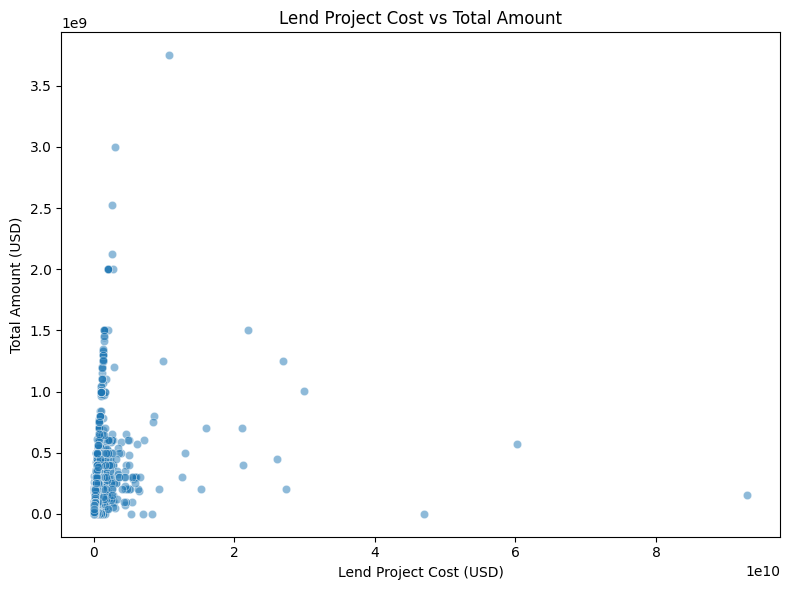

In [80]:
plot_scatter_lendprojectcost_vs_totalamt()

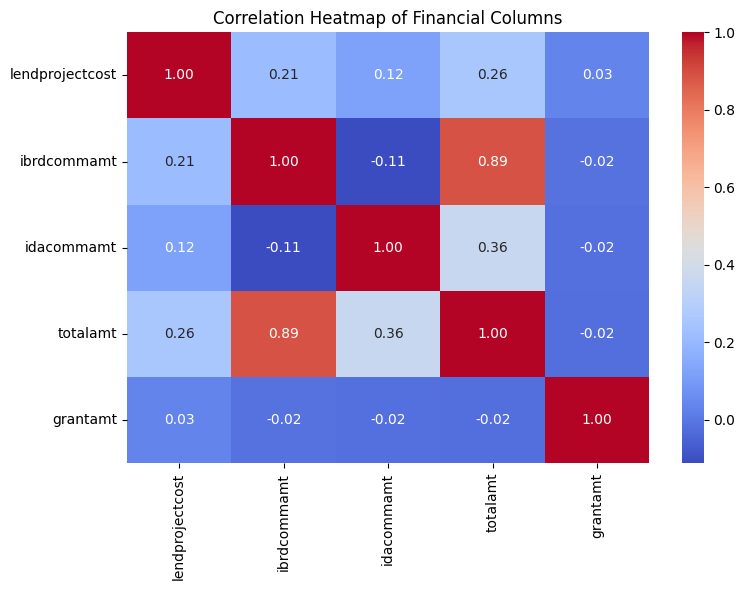

In [81]:
plot_correlation_heatmap()